In [2]:
import numpy as np
import cvxpy as cp
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

(CVXPY) Mar 05 11:56:48 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: 找不到指定的模块。')
(CVXPY) Mar 05 11:56:48 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: 找不到指定的模块。')
(CVXPY) Mar 05 11:56:48 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: 找不到指定的模块。')


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## tech growth no short

In [3]:
data=pd.read_csv('tech_growth_noshort.csv',delimiter=';')
data

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.013972,0.00,0.0012,0.0211,0.0000,0.1088,0.0,0.5811,0.2548,0.0000,0.0000,0.0329
2,0.013831,0.01,0.0033,0.0235,0.0000,0.1082,0.0,0.5763,0.2483,0.0000,0.0000,0.0403
3,0.013695,0.02,0.0061,0.0256,0.0000,0.1075,0.0,0.5713,0.2423,0.0000,0.0000,0.0472
4,0.013565,0.03,0.0089,0.0278,0.0000,0.1067,0.0,0.5663,0.2363,0.0000,0.0000,0.0539
...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.027742,1.36,0.0659,0.0000,0.4581,0.0000,0.0,0.0000,0.0000,0.0771,0.3988,0.0000
138,0.028256,1.37,0.0585,0.0000,0.4681,0.0000,0.0,0.0000,0.0000,0.0632,0.4101,0.0000
139,0.028784,1.38,0.0512,0.0000,0.4782,0.0000,0.0,0.0000,0.0000,0.0493,0.4213,0.0000
140,0.029328,1.39,0.0438,0.0000,0.4882,0.0000,0.0,0.0000,0.0000,0.0354,0.4326,0.0000


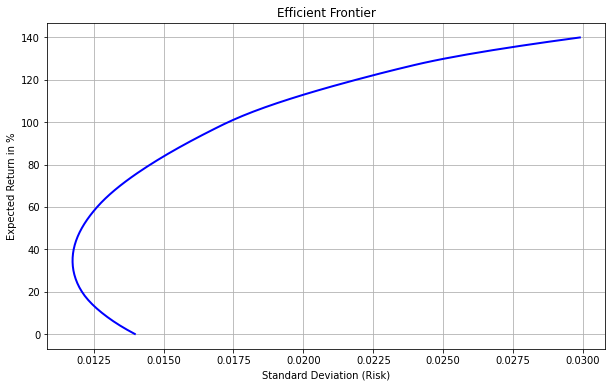

In [4]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


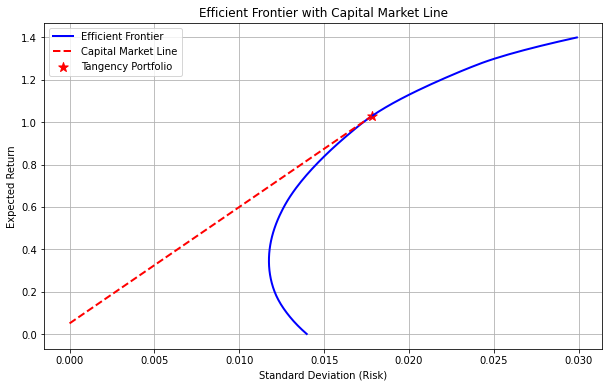

In [5]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data['SharpeRatio'] = (data['ERp'] - risk_free_rate) / (data['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data.loc[data['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data['SDp'], data['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
tangency_portfolio 

SDp             0.017829
ERp             1.030000
x1              0.116700
x2              0.000700
x3              0.191100
x4              0.000000
x5              0.182500
x6              0.000000
x7              0.000000
x8              0.180400
x9              0.157300
x10             0.171300
SharpeRatio    54.967414
Name: 104, dtype: float64

## Consumption growth short


In [6]:
data_short=pd.read_csv('C:/Users/herry/Desktop/optimization final graph/tech_growth_short.csv',delimiter=';')
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.013334,0.00,0.0347,0.0584,-0.0619,0.1052,0.0535,0.5545,0.2025,-0.0318,-0.0335,0.1184
2,0.013249,0.01,0.0353,0.0581,-0.0599,0.1043,0.0552,0.5503,0.1992,-0.0298,-0.0320,0.1193
3,0.013165,0.02,0.0359,0.0578,-0.0579,0.1033,0.0569,0.5461,0.1958,-0.0277,-0.0305,0.1203
4,0.013084,0.03,0.0365,0.0575,-0.0560,0.1024,0.0586,0.5419,0.1924,-0.0256,-0.0290,0.1212
...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013966,0.76,0.0799,0.0356,0.0870,0.0345,0.1820,0.2357,-0.0536,0.1259,0.0821,0.1910
78,0.014066,0.77,0.0805,0.0353,0.0890,0.0336,0.1837,0.2315,-0.0570,0.1280,0.0836,0.1919
79,0.014167,0.78,0.0811,0.0350,0.0909,0.0327,0.1854,0.2273,-0.0604,0.1301,0.0851,0.1929
80,0.014270,0.79,0.0817,0.0347,0.0929,0.0317,0.1870,0.2231,-0.0637,0.1321,0.0866,0.1938


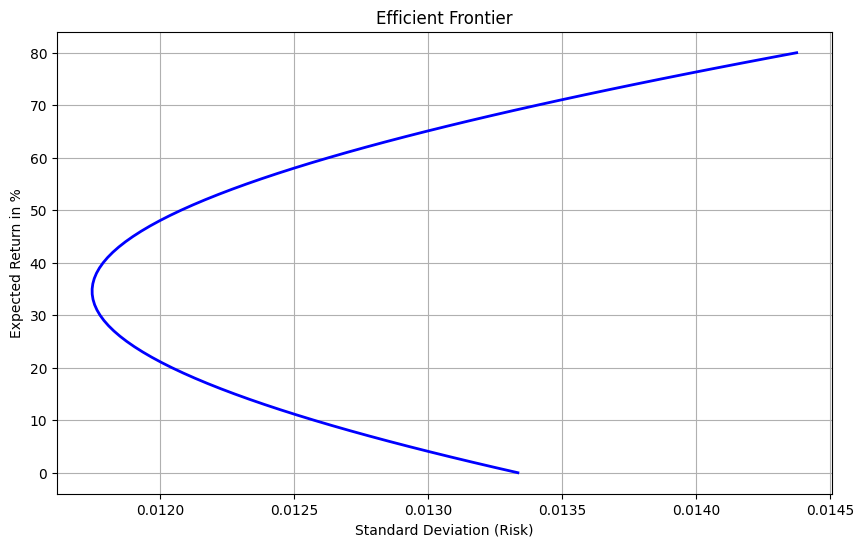

In [7]:
# Plotting the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp']*100, 'b-', linewidth=2)
plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return in %')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()


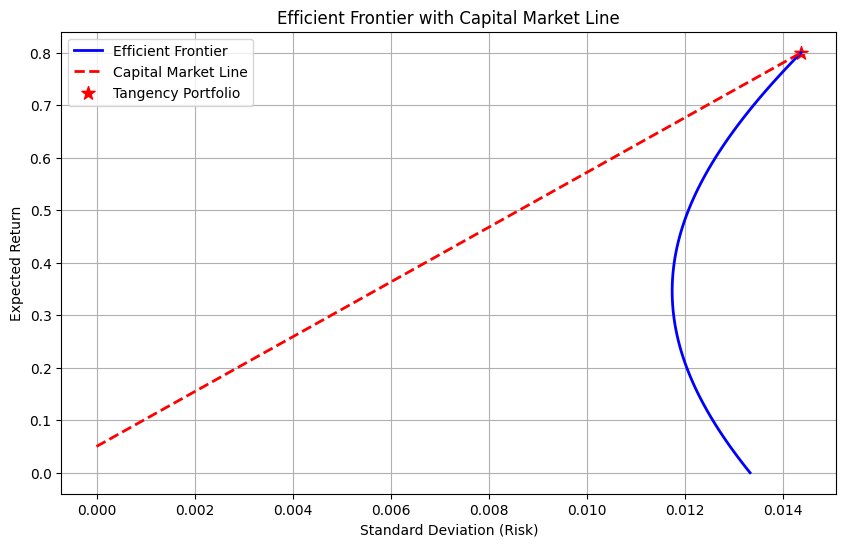

In [8]:
# Assuming 'risk_free_rate' is defined as the risk-free rate
risk_free_rate = 0.05

# Calculate the Sharpe ratio for each portfolio on the efficient frontier
data_short['SharpeRatio'] = (data_short['ERp'] - risk_free_rate) / (data_short['SDp'])

# Find the portfolio with the highest Sharpe ratio (tangency portfolio)
tangency_portfolio = data_short.loc[data_short['SharpeRatio'].idxmax()]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(data_short['SDp'], data_short['ERp'], 'b-', linewidth=2, label='Efficient Frontier')

# Plot the Capital Market Line (CML)
cml_x = [0, tangency_portfolio['SDp']]
cml_y = [risk_free_rate, tangency_portfolio['ERp']]
plt.plot(cml_x, cml_y, 'r--', linewidth=2, label='Capital Market Line')

# Mark the tangency portfolio
plt.scatter(tangency_portfolio['SDp'], tangency_portfolio['ERp'], color='red', marker='*', s=100, label='Tangency Portfolio')

plt.xlabel('Standard Deviation (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
tangency_portfolio

SDp             0.014375
ERp             0.800000
x1              0.082300
x2              0.034400
x3              0.094800
x4              0.030800
x5              0.188700
x6              0.218900
x7             -0.067100
x8              0.134200
x9              0.088100
x10             0.194800
SharpeRatio    52.175380
Name: 81, dtype: float64

In [10]:
data_short

,SDp,ERp,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,SharpeRatio
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.013334,0.00,0.0347,0.0584,-0.0619,0.1052,0.0535,0.5545,0.2025,-0.0318,-0.0335,0.1184,-3.749777
2,0.013249,0.01,0.0353,0.0581,-0.0599,0.1043,0.0552,0.5503,0.1992,-0.0298,-0.0320,0.1193,-3.019165
3,0.013165,0.02,0.0359,0.0578,-0.0579,0.1033,0.0569,0.5461,0.1958,-0.0277,-0.0305,0.1203,-2.278727
4,0.013084,0.03,0.0365,0.0575,-0.0560,0.1024,0.0586,0.5419,0.1924,-0.0256,-0.0290,0.1212,-1.528607
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.013966,0.76,0.0799,0.0356,0.0870,0.0345,0.1820,0.2357,-0.0536,0.1259,0.0821,0.1910,50.836083
78,0.014066,0.77,0.0805,0.0353,0.0890,0.0336,0.1837,0.2315,-0.0570,0.1280,0.0836,0.1919,51.187076
79,0.014167,0.78,0.0811,0.0350,0.0909,0.0327,0.1854,0.2273,-0.0604,0.1301,0.0851,0.1929,51.527127
80,0.014270,0.79,0.0817,0.0347,0.0929,0.0317,0.1870,0.2231,-0.0637,0.1321,0.0866,0.1938,51.856480
